In [1]:
# Modules 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as datetime

# File to path
file_to_load = "clean_df.csv"

# Read files
data_df = pd.read_csv(file_to_load)

#print cleaned data 
data_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False


In [2]:
data_df.columns

Index(['Unnamed: 0', 'station_id', 'stationname', 'date', 'daytype', 'rides',
       'Blackhawks', 'Cubs', 'Bulls', 'Bears', 'White Sox'],
      dtype='object')

In [3]:
# Adding a column for year
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['yearmonth'] = data_df['date'].apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=1))
data_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False,2017-12-01
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False,2017-12-01
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False,2017-12-01
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False,2017-12-01
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False,2020-09-01
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False,2020-09-01
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False,2020-09-01
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False,2020-09-01


In [4]:
#creating df for only the Roosevelt Stop

roosevelt_df = data_df.loc[data_df['station_id'] == 41400]
roosevelt_df.dtypes

Unnamed: 0              int64
station_id              int64
stationname            object
date           datetime64[ns]
daytype                object
rides                   int64
Blackhawks               bool
Cubs                     bool
Bulls                    bool
Bears                    bool
White Sox                bool
yearmonth      datetime64[ns]
dtype: object

In [5]:
roosevelt_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
83,83,41400,Roosevelt,2017-12-31,U,4775,False,False,True,False,False,2017-12-01
197,197,41400,Roosevelt,2017-12-27,W,6404,False,False,True,False,False,2017-12-01
356,356,41400,Roosevelt,2017-12-14,W,10434,False,False,False,False,False,2017-12-01
432,432,41400,Roosevelt,2017-12-09,A,7331,False,False,True,False,False,2017-12-01
611,611,41400,Roosevelt,2017-12-18,W,9385,False,False,True,False,False,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
196227,1027585,41400,Roosevelt,2020-09-26,A,2907,False,False,False,False,False,2020-09-01
196228,1027586,41400,Roosevelt,2020-09-27,U,2158,False,False,False,False,False,2020-09-01
196229,1027587,41400,Roosevelt,2020-09-28,W,3025,False,False,False,False,False,2020-09-01
196230,1027588,41400,Roosevelt,2020-09-29,W,3013,False,False,False,False,False,2020-09-01


In [6]:
#removing 2020 data as it is pulling down average ridership for baseline estimate
pre_covid = roosevelt_df.loc[roosevelt_df['yearmonth']< "2020-01-01"]

pre_covid

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
83,83,41400,Roosevelt,2017-12-31,U,4775,False,False,True,False,False,2017-12-01
197,197,41400,Roosevelt,2017-12-27,W,6404,False,False,True,False,False,2017-12-01
356,356,41400,Roosevelt,2017-12-14,W,10434,False,False,False,False,False,2017-12-01
432,432,41400,Roosevelt,2017-12-09,A,7331,False,False,True,False,False,2017-12-01
611,611,41400,Roosevelt,2017-12-18,W,9385,False,False,True,False,False,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
182227,990342,41400,Roosevelt,2017-02-12,U,7255,False,False,False,False,False,2017-02-01
182640,998228,41400,Roosevelt,2017-01-26,W,10453,False,False,False,False,False,2017-01-01
182699,999268,41400,Roosevelt,2017-02-26,U,6075,False,False,False,False,False,2017-02-01
183078,1006279,41400,Roosevelt,2017-04-16,U,5769,False,True,False,False,False,2017-04-01


In [7]:
#creating a non game day only from roosevelt df
nongame_day_df = pre_covid.loc[pre_covid['Bears'] == False]

nongame_day_df.head()

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
83,83,41400,Roosevelt,2017-12-31,U,4775,False,False,True,False,False,2017-12-01
197,197,41400,Roosevelt,2017-12-27,W,6404,False,False,True,False,False,2017-12-01
356,356,41400,Roosevelt,2017-12-14,W,10434,False,False,False,False,False,2017-12-01
432,432,41400,Roosevelt,2017-12-09,A,7331,False,False,True,False,False,2017-12-01
611,611,41400,Roosevelt,2017-12-18,W,9385,False,False,True,False,False,2017-12-01


In [8]:
# creating a game day only df from roosevelt df
bears_gameday_df = pre_covid.loc[pre_covid['Bears'] == True]

bears_gameday_df.head()

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
1515,1515,41400,Roosevelt,2017-12-24,U,7317,False,False,False,True,False,2017-12-01
2244,2244,41400,Roosevelt,2017-12-03,U,9972,True,False,False,True,False,2017-12-01
39090,39095,41400,Roosevelt,2018-08-25,A,11201,False,True,False,True,False,2018-08-01
39095,39100,41400,Roosevelt,2018-08-30,W,14000,False,False,False,True,True,2018-08-01
43418,43423,41400,Roosevelt,2018-09-17,W,14536,False,False,False,True,False,2018-09-01


In [9]:
#Non game day average ridership  Need nongame day avgs and game day avgs to get a bar chart

Non_gameday_avg = nongame_day_df['rides'].mean()

Weekday_non_df = nongame_day_df.loc[nongame_day_df['daytype'] =="W"]
weekday_non_avg = Weekday_non_df['rides'].mean()

Saturday_non_df = nongame_day_df.loc[nongame_day_df['daytype'] =="A"]
saturday_non_avg = Saturday_non_df['rides'].mean()

Sunday_non_df = nongame_day_df.loc[nongame_day_df['daytype'] =="U"]
sunday_non_avg = Sunday_non_df['rides'].mean()

In [10]:
# Game day average ridership - need both non game and game days avgs to get bar chart data

gameday_avg = bears_gameday_df['rides'].mean()

Weekday_gameday_df = bears_gameday_df[bears_gameday_df['daytype'] =="W"]
weekday_gameday_avg = Weekday_gameday_df['rides'].mean()

Saturday_gameday_df = bears_gameday_df[bears_gameday_df['daytype'] =="A"]
saturday_gameday_avg = Saturday_gameday_df['rides'].mean()

Sunday_gameday_df = bears_gameday_df[bears_gameday_df['daytype'] =="U"]
sunday_gameday_avg = Sunday_gameday_df['rides'].mean()

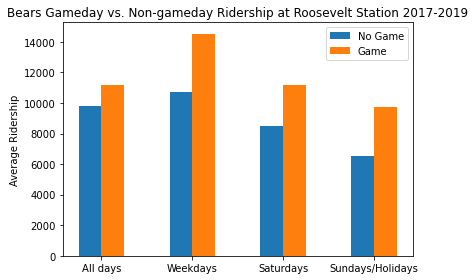

In [11]:
# Build out bar graph to compare game day and non game day averages based on day type - Konsta helped me with this

labels = ['All days', 'Weekdays', 'Saturdays', 'Sundays/Holidays']
nongameday_avgs = [Non_gameday_avg, weekday_non_avg, saturday_non_avg, sunday_non_avg]
gameday_avgs = [gameday_avg, weekday_gameday_avg, saturday_gameday_avg, sunday_gameday_avg]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nongameday_avgs, width, label='No Game')
rects2 = ax.bar(x + width/2, gameday_avgs, width, label='Game')

ax.set_ylabel('Average Ridership')
ax.set_title('Bears Gameday vs. Non-gameday Ridership at Roosevelt Station 2017-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

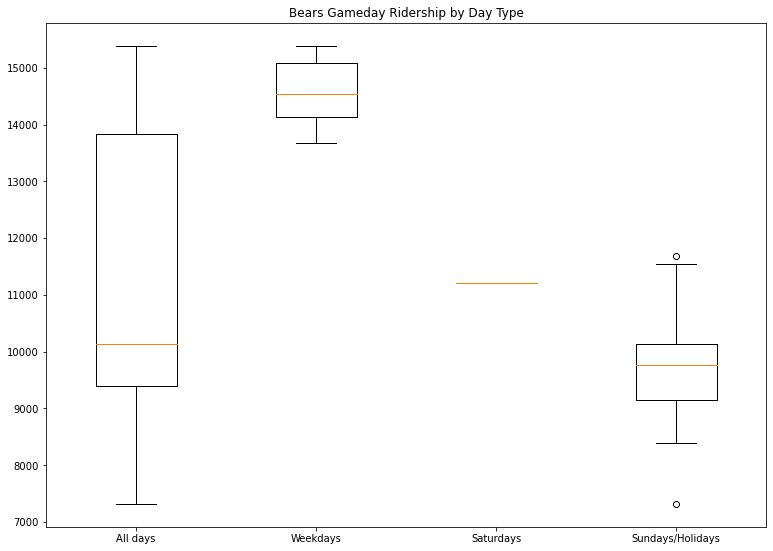

In [12]:
#trying a boxplot to see if it shows anything interesting - using Konsta's formatting

data1 = bears_gameday_df['rides']
data2 = Weekday_gameday_df['rides']
data3 = Saturday_gameday_df['rides']
data4 = Sunday_gameday_df['rides']

data = [data1, data2, data3, data4]

fig = plt.figure(figsize=(10,7))

ax = fig.add_axes([0,0,1,1])
ax.set_title('Bears Gameday Ridership by Day Type')

bp = ax.boxplot(data, labels=labels)

plt.show()




In [13]:
#creating data frames for each season of Bears games

Bears_2017_df = bears_gameday_df[bears_gameday_df['yearmonth'] <"2018-01-01" ]
Bears_2017_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
1515,1515,41400,Roosevelt,2017-12-24,U,7317,False,False,False,True,False,2017-12-01
2244,2244,41400,Roosevelt,2017-12-03,U,9972,True,False,False,True,False,2017-12-01
138229,188793,41400,Roosevelt,2017-11-19,U,10197,False,False,True,True,False,2017-11-01
143575,284927,41400,Roosevelt,2017-11-12,U,9142,True,False,False,True,False,2017-11-01
143999,292611,41400,Roosevelt,2017-10-09,W,15299,False,False,False,True,False,2017-10-01
145999,329366,41400,Roosevelt,2017-09-10,U,11537,False,True,False,True,True,2017-09-01
147916,363807,41400,Roosevelt,2017-08-10,W,15388,False,False,False,True,True,2017-08-01
154534,486105,41400,Roosevelt,2017-08-31,W,14586,False,True,False,True,False,2017-08-01
155770,508998,41400,Roosevelt,2017-10-22,U,10142,False,False,False,True,False,2017-10-01
180164,952432,41400,Roosevelt,2017-09-24,U,11312,False,False,False,True,True,2017-09-01


In [14]:
season2017= Bears_2017_df.groupby(['yearmonth']).sum()['rides']
season2017

yearmonth
2017-08-01    29974
2017-09-01    22849
2017-10-01    25441
2017-11-01    19339
2017-12-01    17289
Name: rides, dtype: int64

In [15]:
Bears_2018_df = bears_gameday_df[bears_gameday_df['yearmonth'].dt.year== 2018] 

Bears_2018_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
39090,39095,41400,Roosevelt,2018-08-25,A,11201,False,True,False,True,False,2018-08-01
39095,39100,41400,Roosevelt,2018-08-30,W,14000,False,False,False,True,True,2018-08-01
43418,43423,41400,Roosevelt,2018-09-17,W,14536,False,False,False,True,False,2018-09-01
43431,43436,41400,Roosevelt,2018-09-30,U,10779,False,True,False,True,False,2018-09-01
47884,47889,41400,Roosevelt,2018-10-21,U,10132,True,False,False,True,False,2018-10-01
47891,47896,41400,Roosevelt,2018-10-28,U,9769,True,False,False,True,False,2018-10-01
52123,52128,41400,Roosevelt,2018-11-11,U,10072,False,False,False,True,False,2018-11-01
52130,52135,41400,Roosevelt,2018-11-18,U,9107,True,False,False,True,False,2018-11-01
56593,56598,41400,Roosevelt,2018-12-09,U,8384,True,False,False,True,False,2018-12-01
56600,56605,41400,Roosevelt,2018-12-16,U,9252,True,False,False,True,False,2018-12-01


In [16]:
season2018= Bears_2018_df.groupby(['yearmonth']).sum()['rides']
season2018

yearmonth
2018-08-01    25201
2018-09-01    25315
2018-10-01    19901
2018-11-01    19179
2018-12-01    17636
Name: rides, dtype: int64

In [17]:
Bears_2019_df = bears_gameday_df[bears_gameday_df['yearmonth'] >"2019-01-01" ]
Bears_2019_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
91386,91391,41400,Roosevelt,2019-08-08,W,14139,False,False,False,True,False,2019-08-01
91407,91412,41400,Roosevelt,2019-08-29,W,13683,False,False,False,True,True,2019-08-01
95689,95694,41400,Roosevelt,2019-09-05,W,15076,False,False,False,True,False,2019-09-01
95713,95718,41400,Roosevelt,2019-09-29,U,9217,False,False,False,True,True,2019-09-01
100121,100126,41400,Roosevelt,2019-10-20,U,11684,True,False,False,True,False,2019-10-01
100128,100133,41400,Roosevelt,2019-10-27,U,10109,True,False,False,True,False,2019-10-01
104450,104455,41400,Roosevelt,2019-11-10,U,9664,True,False,False,True,False,2019-11-01
104464,104469,41400,Roosevelt,2019-11-24,U,9526,False,False,False,True,False,2019-11-01
108895,108900,41400,Roosevelt,2019-12-05,W,14174,False,False,False,True,False,2019-12-01
108912,108917,41400,Roosevelt,2019-12-22,U,9123,False,False,False,True,False,2019-12-01


In [18]:
season2019= Bears_2019_df.groupby(['yearmonth']).sum()['rides']
season2019

yearmonth
2019-08-01    27822
2019-09-01    24293
2019-10-01    21793
2019-11-01    19190
2019-12-01    23297
Name: rides, dtype: int64

Text(0, 0.5, 'Total Ridership')

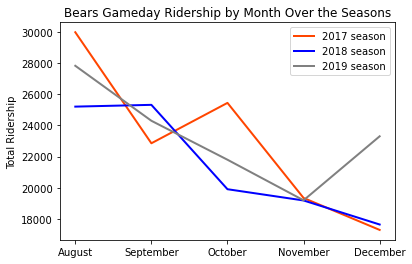

In [19]:
# building out multiple line graph - used this website: https://python-graph-gallery.com/122-multiple-lines-chart/

x_axis_labels =["August", "September", "October", "November", "December"]

plt.plot(x_axis_labels, season2017, marker=' ', color='orangered', linewidth=2, label="2017 season")
plt.plot(x_axis_labels, season2018, marker=' ', color='blue', linewidth=2, label="2018 season")
plt.plot(x_axis_labels, season2019, marker=' ', color='gray', linewidth=2, label="2019 season")
plt.legend()
plt.title('Bears Gameday Ridership by Month Over the Seasons')
plt.ylabel('Total Ridership')